# Import Libraries

In [13]:
%load_ext google.colab.data_table

In [2]:
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import HTML
import nltk
import pandas as pd
from PIL import Image
import numpy as np

In [15]:
pip install h5py

In [16]:
pip install typing-extensions

In [17]:
pip install wheel

In [18]:
!pip install -q --upgrade ipython

In [19]:
!pip install -q --upgrade ipykernel

In [20]:
pip install wordcloud

In [3]:
import pickle


with open('/content/drive/MyDrive/NLPDATA/df_processed.pkl', 'rb') as f:
    df = pickle.load(f)

In [4]:
df.head()

,text_nonstop,stars
0,"[looking, good, creole, dinning, experience, s...",2
1,"[wife, came, two, nights, row, awesome, time, ...",5
2,"[went, get, chicken, sandwich, allergic, spicy...",1
3,"[wonderful, dinner, tonight, chase, even, thou...",5
4,"[reading, reviews, decided, see, burgers, like...",5


# Wordcloud for all reviews

In [23]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("/content/drive/MyDrive/NLPDATA/sb.png"))
  
    wc = WordCloud(background_color="gray",
                  mask = mask,max_words=50000,repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


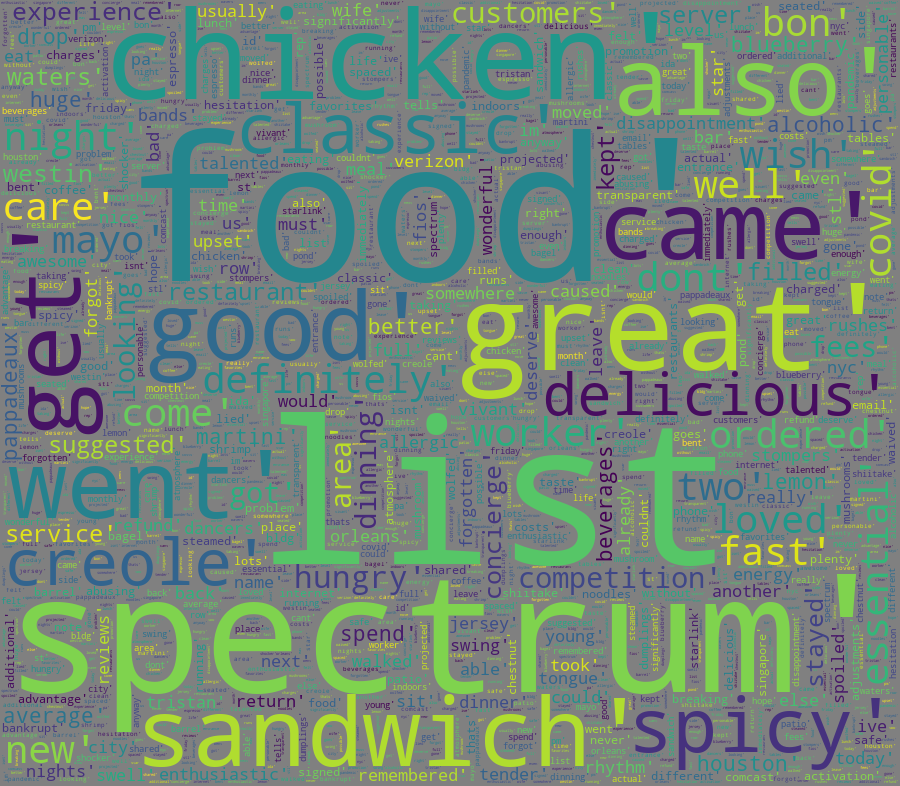

In [24]:
#Creating wordcloud for all reviews
create_wordcloud(df["text_nonstop"].values)


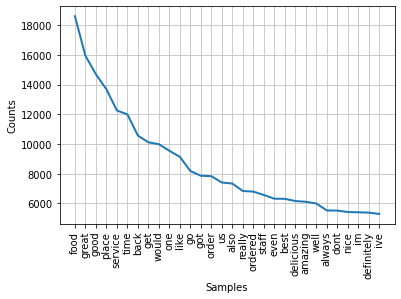

In [25]:
#words frequency for all reviews
from nltk.probability import FreqDist

words_split = []
for i in range(0,40355): 
    for word in df['text_nonstop'][i]:
        words_split.append(word)

FreqDist(words_split).plot(30, cumulative=False)

# Wordcloud for negative reviews

In [26]:
# import warnings
# warnings.filterwarnings("ignore")

df_negative = df[(df['stars']==1) | (df['stars']==2)]
df_negative.count()


text_nonstop    9855
stars           9855
dtype: int64

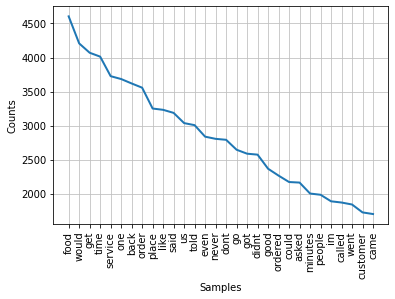

In [27]:
df_negative = df_negative.reset_index(drop=True)
words_split = []
for i in range(0,9854): 
    for word in df_negative['text_nonstop'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

Word Cloud Saved Successfully


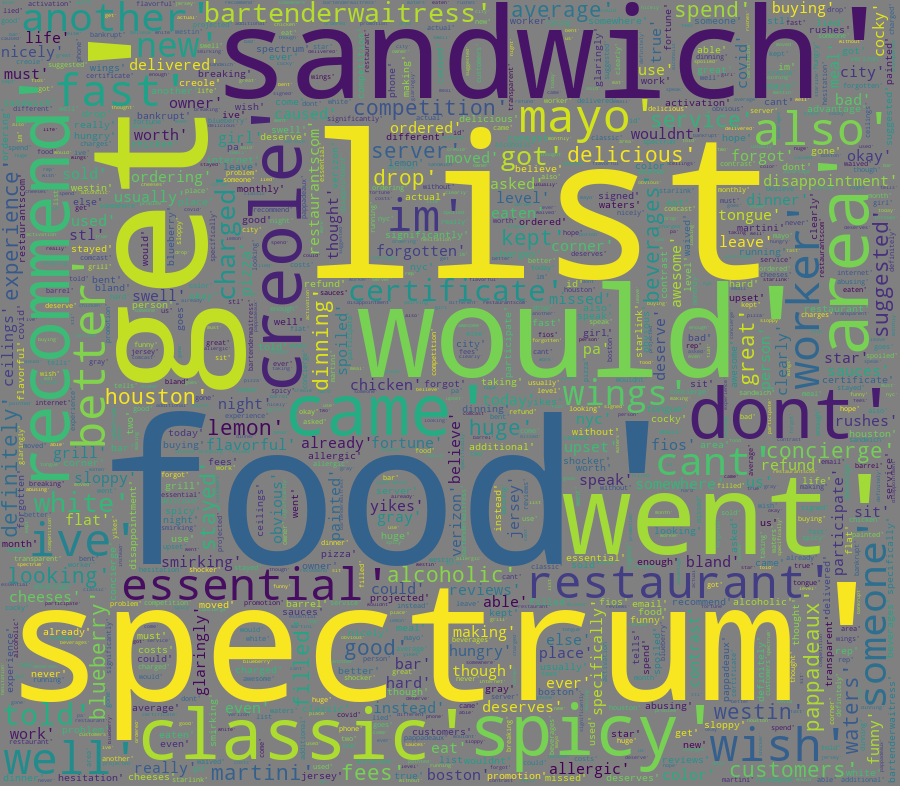

In [28]:
#Creating wordcloud for negative reviews
create_wordcloud(df_negative["text_nonstop"].values)

# Wordcloud for neutral reviews


In [29]:
df_neutral = df[df['stars']==3 ]
df_neutral.count()

text_nonstop    2621
stars           2621
dtype: int64

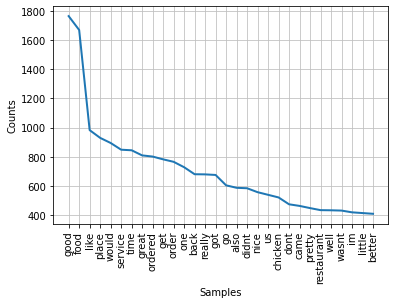

In [30]:
df_neutral = df_neutral.reset_index(drop=True)
words_split = []
for i in range(0,2620): 
    for word in df_neutral['text_nonstop'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

Word Cloud Saved Successfully


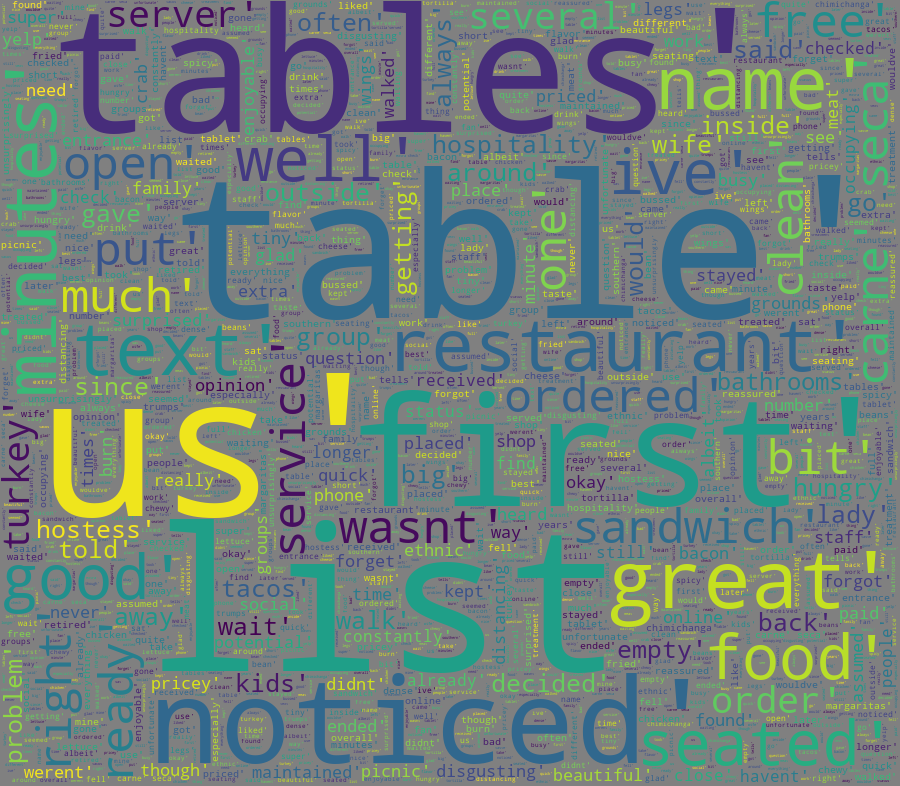

In [31]:
#Creating wordcloud for neutral reviews
create_wordcloud(df_neutral["text_nonstop"].values)

# Wordcloud for positive reviews

In [32]:
df_positive = df[(df['stars']==4) | (df['stars'] ==5)]
df_positive.count()


text_nonstop    27880
stars           27880
dtype: int64

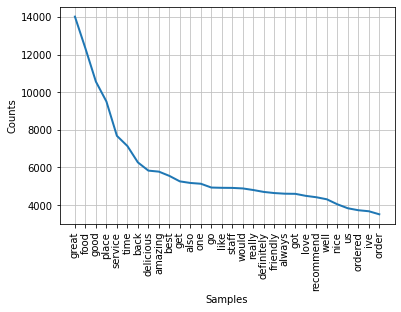

In [33]:
df_positive = df_positive.reset_index(drop=True)
words_split = []
for i in range(0,27880): 
    for word in df_positive['text_nonstop'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

Word Cloud Saved Successfully


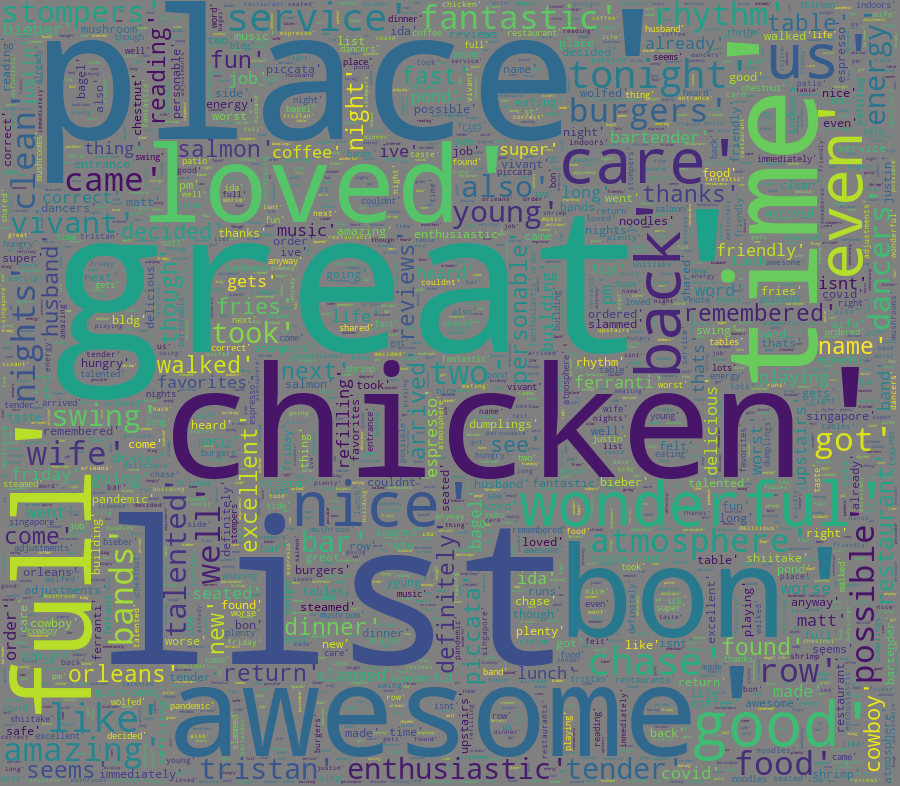

In [34]:
#Creating wordcloud for positive reviews
create_wordcloud(df_positive["text_nonstop"].values)

# **NLP SUPERVISED LEARNING**

In [5]:
df.stars.value_counts(normalize=True)

5    0.561106
1    0.183764
4    0.129745
3    0.064947
2    0.060437
Name: stars, dtype: float64

In [6]:
# Remove 3 star reviews
df = df[df.stars!=3]

# Set 4/5 star reviews to positive, the rest to negative
df['sentiment'] = np.where(df['stars'] >= 4, 'positive', 'negative')

# Include only the sentiment and reviews columns
df = df[['sentiment', 'text_nonstop']]
df.head()

,sentiment,text_nonstop
0,negative,"[looking, good, creole, dinning, experience, s..."
1,positive,"[wife, came, two, nights, row, awesome, time, ..."
2,negative,"[went, get, chicken, sandwich, allergic, spicy..."
3,positive,"[wonderful, dinner, tonight, chase, even, thou..."
4,positive,"[reading, reviews, decided, see, burgers, like..."


In [7]:
len(df)

37735

In [8]:
# Note that the dataset has mostly positive reviews
df.sentiment.value_counts(normalize=True)

positive    0.738837
negative    0.261163
Name: sentiment, dtype: float64

## Prepare Data For Modeling

In [9]:
# Split the data into X and y data sets
X = df.text_nonstop.astype(str)
y = df.sentiment

In [10]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train.shape

(30188,)

##CountVectorizer

In [12]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer()

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

tcmalloc: large alloc 9870270464 bytes == 0x560834d7c000 @  0x7f6fb0cb1001 0x7f6fa24a41af 0x7f6fa24fac23 0x7f6fa24fba87 0x7f6fa259d823 0x56082bdf234c 0x56082bdf2120 0x56082be66b80 0x56082bdf39da 0x56082be662c0 0x56082be6102f 0x56082bdf3aba 0x56082be662c0 0x56082be6102f 0x56082be60d43 0x56082be5f1b0 0x56082bdf2229 0x56082bdf2120 0x56082be65f33 0x56082bee6af5 0x56082be631bd 0x56082bee6af5 0x56082be631bd 0x56082bee6af5 0x56082bdf21cd 0x56082bee4b3d 0x56082be66458 0x56082bdf39da 0x56082be61eae 0x56082bdf39da 0x56082be62108
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaaaaaaaaaaaaaaaaaa,aaaaaaand,aaaaaand,aaaaamazing,aaaaand,aaaugh,aaliyah,aamazing,...,家常豆腐,帆立刺身,成都辣子鸡,海南雞飯,猪肉炖粉条,笋尖炒肉丝,谁知新来的男的剪得更烂,身が大きくてとても美味しかったです,这家店原以为女的剪得不好,鱼香茄子
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# # The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
# cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

# X_train_cv2 = cv2.fit_transform(X_train)
# X_test_cv2  = cv2.transform(X_test)

# pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

### Logistic Regression

In [13]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [14]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
# # Train the second model
# lr.fit(X_train_cv2, y_train)
# y_pred_cv2 = lr.predict(X_test_cv2)

In [15]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

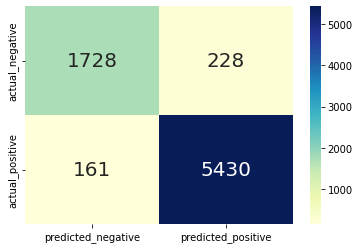

In [16]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

In [49]:
# # The heat map for the second logistic regression model
# cm2 = conf_matrix(y_test, y_pred_cv2)

In [17]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1']
results

,LogReg1
Accuracy,0.948
Precision,0.960
Recall,0.971
F1 Score,0.965


### Naive Bayes

In [18]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

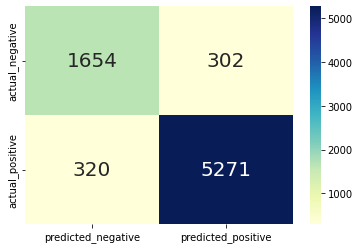

In [19]:
# Here's the heat map for the first Naive Bayes model
cm2 = conf_matrix(y_test, y_pred_cv1_nb)

In [53]:
# # Here's the heat map for the second Naive Bayes model
# cm4 = conf_matrix(y_test, y_pred_cv2_nb)

In [20]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm2)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1,NB1
Accuracy,0.948,0.918
Precision,0.960,0.946
Recall,0.971,0.943
F1 Score,0.965,0.944


### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(X_test_cv1)

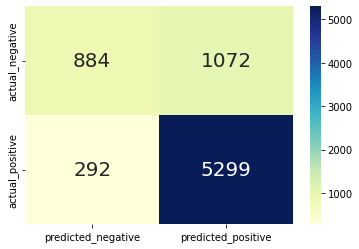

In [22]:
cm3 = conf_matrix(y_test, y_pred_cv1_knn)

In [23]:
# Compile all of the error metrics into a dataframe for comparison
results_knn = pd.DataFrame(list(zip(cm3)))
results_knn = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_knn.columns = ['KNN1']
results_knn

results = pd.concat([results, results_knn], axis=1)
results

,LogReg1,NB1,KNN1
Accuracy,0.948,0.918,0.918
Precision,0.960,0.946,0.946
Recall,0.971,0.943,0.943
F1 Score,0.965,0.944,0.944


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

import datetime

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 100)


In [25]:
#another way of running all the algorithms together
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log1 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_cv1, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    train_predictions = clf.predict(X_test_cv1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')

    
    log_entry = pd.DataFrame([[name, "CountVectorizer",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log1 = log1.append(log_entry)
#print("="*30)
round(log1,3)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,94.846,94.806,94.846,94.816
0,KNeighborsClassifier,CountVectorizer,81.927,81.099,81.927,80.265
0,DecisionTreeClassifier,CountVectorizer,87.386,87.321,87.386,87.352
0,RandomForestClassifier,CountVectorizer,91.811,91.907,91.811,91.479
0,AdaBoostClassifier,CountVectorizer,90.341,90.154,90.341,90.113
0,GradientBoostingClassifier,CountVectorizer,89.413,89.589,89.413,88.785
0,MultinomialNB,CountVectorizer,91.758,91.784,91.758,91.771
0,BernoulliNB,CountVectorizer,86.935,86.551,86.935,86.583


## TF-IDF

In [26]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)


In [27]:
pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).head()

tcmalloc: large alloc 9825107968 bytes == 0x560a94b58000 @  0x7f6fb0cb1001 0x7f6fa24a41af 0x7f6fa24fac23 0x7f6fa24fba87 0x7f6fa259d823 0x56082bdf234c 0x56082bdf2120 0x56082be66b80 0x56082bdf39da 0x56082be662c0 0x56082be6102f 0x56082bdf3aba 0x56082be662c0 0x56082be6102f 0x56082be60d43 0x56082be5f1b0 0x56082bdf2229 0x56082bdf2120 0x56082be65f33 0x56082bee6af5 0x56082be631bd 0x56082bee6af5 0x56082be631bd 0x56082bee6af5 0x56082bdf21cd 0x56082bee4b3d 0x56082be66458 0x56082bdf39da 0x56082be61eae 0x56082bdf39da 0x56082be62108


,aa,aaa,aaaaaaaaaaaaaaaaaaaaa,aaaaaaand,aaaaaand,aaaaamazing,aaaaand,aaaugh,aaliyah,aamazing,aardvark,aaron,...,地元で採れた新鮮なウニ,夫妻肺片,家常豆腐,帆立刺身,成都辣子鸡,海南雞飯,猪肉炖粉条,笋尖炒肉丝,谁知新来的男的剪得更烂,身が大きくてとても美味しかったです,这家店原以为女的剪得不好,鱼香茄子
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


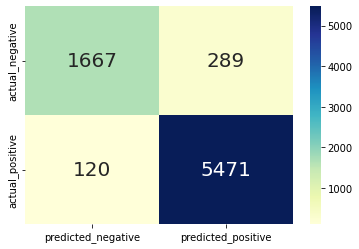

In [28]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm4 = conf_matrix(y_test, y_pred_tfidf1_lr)

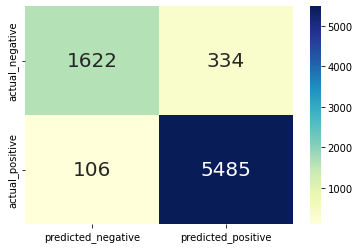

In [29]:
# Fit the second logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm5 = conf_matrix(y_test, y_pred_tfidf2_lr)

tcmalloc: large alloc 9825107968 bytes == 0x560d9270c000 @  0x7f6fb0cb1001 0x7f6fa24a41af 0x7f6fa24fac23 0x7f6fa24fba87 0x7f6fa259d823 0x56082bdf234c 0x56082bdf2120 0x56082be66b80 0x56082bdf39da 0x56082be662c0 0x56082be6102f 0x56082bdf3aba 0x56082be662c0 0x56082be6102f 0x56082be60d43 0x56082be5f1b0 0x56082bdf2229 0x56082bdf2120 0x56082be65f33 0x56082bee6af5 0x56082be631bd 0x56082bee6af5 0x56082be631bd 0x56082bee6af5 0x56082bdf21cd 0x56082bee4b3d 0x56082be66458 0x56082bdf39da 0x56082be61eae 0x56082bdf39da 0x56082be62108


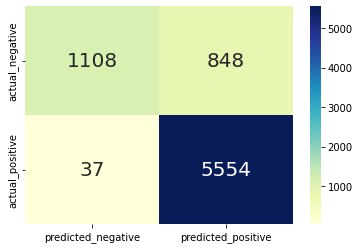

In [30]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm6 = conf_matrix(y_test, y_pred_tfidf1_nb)

In [31]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm4,cm5, cm6)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR1-TFIDF', 'LR2-TFIDF', 'NB1-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LogReg1,NB1,KNN1,LR1-TFIDF,LR2-TFIDF,NB1-TFIDF
Accuracy,0.948,0.918,0.918,0.946,0.942,0.883
Precision,0.960,0.946,0.946,0.950,0.943,0.868
Recall,0.971,0.943,0.943,0.979,0.981,0.993
F1 Score,0.965,0.944,0.944,0.964,0.962,0.926


In [32]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log3 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_tfidf1, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    train_predictions = clf.predict(X_test_tfidf1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    #print("Accuracy: {:.2%}".format(accuracy))
    #print("Precision: {:.2%}".format(precision))
    #print("Recall: {:.2%}".format(recall))
    #print("F1 Score: {:.2%}".format(f1))

    #train_predictions = clf.predict_proba(X_test_cv1)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "TF-IDF",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log3 = log3.append(log_entry)
#print("="*30)
round(log3,3)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,TF-IDF,94.581,94.543,94.581,94.499
0,KNeighborsClassifier,TF-IDF,84.100,83.428,84.100,83.339
0,DecisionTreeClassifier,TF-IDF,87.664,87.526,87.664,87.585
0,RandomForestClassifier,TF-IDF,92.182,92.288,92.182,91.876
0,AdaBoostClassifier,TF-IDF,89.718,89.500,89.718,89.458
0,GradientBoostingClassifier,TF-IDF,89.493,89.692,89.493,88.864
0,MultinomialNB,TF-IDF,88.273,89.350,88.273,87.137
0,BernoulliNB,TF-IDF,87.280,86.914,87.280,86.926


In [33]:
# Compile all of the error metrics into a dataframe for comparison

result = pd.concat([log1,log3],axis=0)
result

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,94.845634,94.805744,94.845634,94.816076
0,KNeighborsClassifier,CountVectorizer,81.926593,81.099394,81.926593,80.265325
0,DecisionTreeClassifier,CountVectorizer,87.385716,87.321442,87.385716,87.351696
0,RandomForestClassifier,CountVectorizer,91.811316,91.906922,91.811316,91.478709
0,AdaBoostClassifier,CountVectorizer,90.340533,90.153689,90.340533,90.113441
0,GradientBoostingClassifier,CountVectorizer,89.413012,89.588588,89.413012,88.785351
0,MultinomialNB,CountVectorizer,91.758315,91.784053,91.758315,91.770545
0,BernoulliNB,CountVectorizer,86.935206,86.551085,86.935206,86.582876
0,LogisticRegression,TF-IDF,94.580628,94.542609,94.580628,94.498626
0,KNeighborsClassifier,TF-IDF,84.099642,83.427927,84.099642,83.338676


In [34]:
result["CM"]=result["Classifier"] +" "+ result["Methods"]
result.groupby("Classifier").mean()

,Accuracy,Precision,Recall,F1Score
Classifier,,,,
AdaBoostClassifier,90.029151,89.826925,90.029151,89.785641
BernoulliNB,87.107460,86.732659,87.107460,86.754350
DecisionTreeClassifier,87.524844,87.423757,87.524844,87.468100
GradientBoostingClassifier,89.452763,89.640498,89.452763,88.824654
KNeighborsClassifier,83.013118,82.263660,83.013118,81.802001
LogisticRegression,94.713131,94.674176,94.713131,94.657351
MultinomialNB,90.015900,90.566844,90.015900,89.453556
RandomForestClassifier,91.996820,92.097529,91.996820,91.677241


In [35]:
result.sort_values("Accuracy",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,LogisticRegression,CountVectorizer,94.845634,94.805744,94.845634,94.816076,LogisticRegression CountVectorizer
0,LogisticRegression,TF-IDF,94.580628,94.542609,94.580628,94.498626,LogisticRegression TF-IDF
0,RandomForestClassifier,TF-IDF,92.182324,92.288135,92.182324,91.875773,RandomForestClassifier TF-IDF
0,RandomForestClassifier,CountVectorizer,91.811316,91.906922,91.811316,91.478709,RandomForestClassifier CountVectorizer
0,MultinomialNB,CountVectorizer,91.758315,91.784053,91.758315,91.770545,MultinomialNB CountVectorizer


In [36]:
result.sort_values("Precision",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,LogisticRegression,CountVectorizer,94.845634,94.805744,94.845634,94.816076,LogisticRegression CountVectorizer
0,LogisticRegression,TF-IDF,94.580628,94.542609,94.580628,94.498626,LogisticRegression TF-IDF
0,RandomForestClassifier,TF-IDF,92.182324,92.288135,92.182324,91.875773,RandomForestClassifier TF-IDF
0,RandomForestClassifier,CountVectorizer,91.811316,91.906922,91.811316,91.478709,RandomForestClassifier CountVectorizer
0,MultinomialNB,CountVectorizer,91.758315,91.784053,91.758315,91.770545,MultinomialNB CountVectorizer


In [37]:
result.sort_values("Recall",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,LogisticRegression,CountVectorizer,94.845634,94.805744,94.845634,94.816076,LogisticRegression CountVectorizer
0,LogisticRegression,TF-IDF,94.580628,94.542609,94.580628,94.498626,LogisticRegression TF-IDF
0,RandomForestClassifier,TF-IDF,92.182324,92.288135,92.182324,91.875773,RandomForestClassifier TF-IDF
0,RandomForestClassifier,CountVectorizer,91.811316,91.906922,91.811316,91.478709,RandomForestClassifier CountVectorizer
0,MultinomialNB,CountVectorizer,91.758315,91.784053,91.758315,91.770545,MultinomialNB CountVectorizer


In [38]:
result.sort_values("F1Score",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,LogisticRegression,CountVectorizer,94.845634,94.805744,94.845634,94.816076,LogisticRegression CountVectorizer
0,LogisticRegression,TF-IDF,94.580628,94.542609,94.580628,94.498626,LogisticRegression TF-IDF
0,RandomForestClassifier,TF-IDF,92.182324,92.288135,92.182324,91.875773,RandomForestClassifier TF-IDF
0,MultinomialNB,CountVectorizer,91.758315,91.784053,91.758315,91.770545,MultinomialNB CountVectorizer
0,RandomForestClassifier,CountVectorizer,91.811316,91.906922,91.811316,91.478709,RandomForestClassifier CountVectorizer


# Training the Final Model

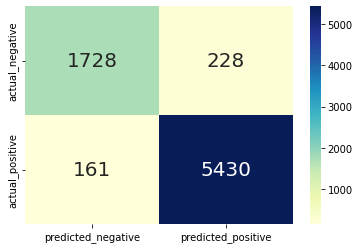

In [39]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)
cm = conf_matrix(y_test, y_pred_cv1)

In [40]:
# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv1)
f1 = f1_score(y_test, y_pred_cv1,average='weighted')
precision = precision_score(y_test, y_pred_cv1,average='weighted')
recall = recall_score(y_test, y_pred_cv1,average='weighted')
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

Accuracy: 94.85%
Precision: 94.81%
Recall: 94.85%
F1 Score: 94.82%


In [41]:
df.to_csv("df_review.csv")

In [42]:
filename = 'finalized_model.pkl'
pickle.dump(lr, open(filename, 'wb'))